<a href="https://colab.research.google.com/github/Blueprint-GitHub/Study_Note/blob/main/Deep_learning_with_keras/Deep_learning_with_keras_chapter_5~_%ED%95%A8%EC%88%98%ED%98%95API_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

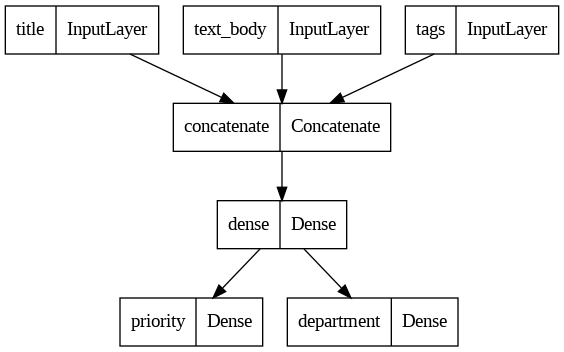

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape = (vocabulary_size,), name = 'title')
text_body = keras.Input(shape = (vocabulary_size,), name = "text_body")
tags = keras.Input(shape = (num_tags,), name = "tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation = "relu")(features) #이게 돼?

priority = layers.Dense(1, activation = "sigmoid", name = "priority")(features)
department = layers.Dense(
    num_departments, activation = "softmax", name = "department")(features)

model = keras.Model(inputs = [title,text_body,tags],
                    outputs = [priority, department])

In [ ]:
val_acc_noise = history_noise.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, val_acc_noise , 'b-',
         label = 'Validation accuracy with noise channels')
plt.title('effect of noise on validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

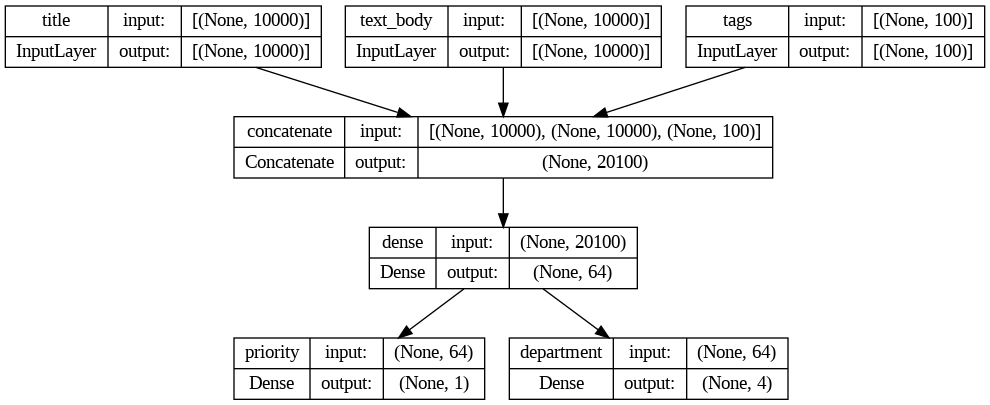

In [ ]:
keras.utils.plot_model(
    model, 'samples.png', show_shapes = True)

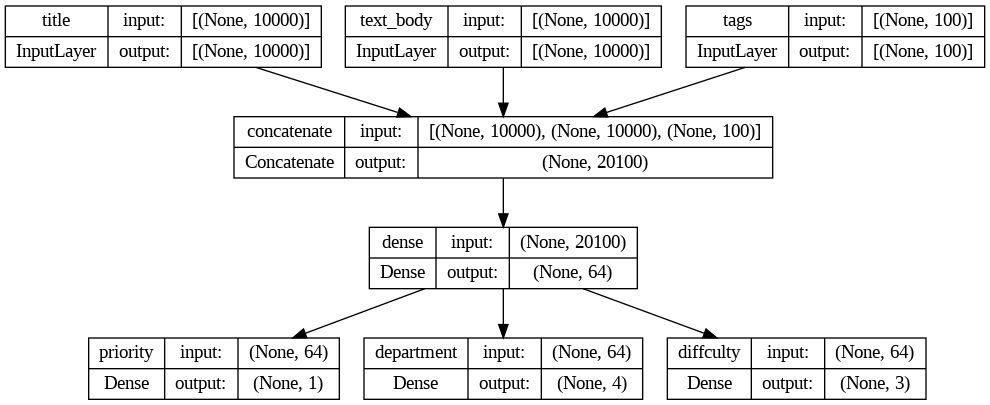

In [ ]:
features = model.layers[4].output # 원래 모델 중간에 새로운거 껴넣어서 새로운 모델 만들기
difficulty = layers.Dense(3, activation = 'softmax', name = "diffculty")(features)
new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty])

keras.utils.plot_model(
    new_model, "update_ticket_classifier.png", show_shapes = True)